In [2]:
import numpy as np 
import pandas as pd 
import os
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_excel('nyc_benchmarking_disclosure_2017_consumption_data.xlsx',
                     'Information and Metrics')

data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,10019,Not found,Not found,Manhattan,Not found,169416,Office,"Bank Branch, Office",Office,164754.0,Bank Branch,4662.0,NaN,NaN,1909,1,95,Whole Building,Whole Building,90.0,138.4,141.0,53.8,56.2,11.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,1133475.1,NaN,NaN,1435754.7,16672.2,6551394.1,1920103.6,1920103.6,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,11373,Not found,Not found,Queens,Not found,94380,K-12 School,K-12 School,K-12 School,94380.0,NaN,NaN,NaN,NaN,1963,1,100,Whole Building,NaN,100.0,43.5,46.8,28.4,31.3,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2068300.1,23243.7,616343.7,180640.0,184131.9,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,10001-7507,Not found,Not found,Manhattan,Not found,125000,Hotel,Hotel,Hotel,125000.0,NaN,NaN,NaN,NaN,1999,1,85,Whole Building,Whole Building,83.0,271.1,274.7,130.2,133.7,18.8,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8245445.1,86776.9,8033914.4,2354605.3,2354605.3,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,10001,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,1994,1,100,Whole Building,NaN,27.0,163.0,167.9,76.5,80.8,11.7,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1848519.4,20520.9,1976691.9,579335.2,582516.1,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,10038,Not found,Not found,Manhattan,Not found,50000,Hotel,Hotel,Hotel,50000.0,NaN,NaN,NaN,NaN,2012,1,0,Whole Building,Whole Building,99.0,64.2,64.2,20.5,20.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022951.6,299809.9,299809.9,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       34355 non-null  int64         
 1   Property Id                                                 34355 non-null  int64         
 2   Property Name                                               34355 non-null  object        
 3   Parent Property Id                                          1723 non-null   object        
 4   Parent Property Name                                        1723 non-null   object        
 5   BBL - 10 digits                                             33625 non-null  float64       
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object        
 7   NYC Building Identific

In [7]:
data = data.replace({'Not Available': np.nan})

In [8]:
data.describe()

,Order,Property Id,BBL - 10 digits,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²)
count,34355.000000,3.435500e+04,3.362500e+04,3.435500e+04,3.432300e+04,7226.000000,2450.000000,34355.000000,34355.000000,34355.000000,25454.000000,3.188800e+04,2.856000e+04,3.188800e+04,2.856000e+04,31001.000000,28042.000000,3.600000e+01,5.664000e+03,2.378000e+03,4.840000e+02,7.000000e+01,1.0,1.568000e+03,8.000000e+00,3.000000e+01,2.881900e+04,2.804700e+04,3.157600e+04,3.157600e+04,3.101300e+04,2.383000e+03,3.295700e+04,3.311600e+04,3.308800e+04,1.828000e+04,1.827100e+04
mean,17355.145103,4.710374e+06,2.249470e+09,1.149392e+05,1.115422e+05,20136.231746,11179.502776,1946.106855,1.196565,98.393101,53.927163,1.265785e+03,1.393057e+03,9.922633e+02,1.094395e+03,15.869072,1.154839,1.653033e+06,2.523975e+06,5.136646e+06,3.145131e+06,9.300335e+05,11919336.1,5.349684e+09,1.014108e+08,6.269823e+07,3.468667e+07,3.576895e+05,3.833599e+06,1.123563e+06,1.126104e+06,2.635069e+03,1.893548e+04,1.665273e+03,1.719766e+04,9.964984e+03,5.869470e+02
std,10016.661222,1.676669e+06,1.193104e+09,2.164591e+05,2.108989e+05,51022.113092,24105.730990,32.725881,2.959191,8.917131,32.573629,1.626921e+05,1.719455e+05,1.349948e+05,1.426694e+05,946.687948,58.542330,1.809641e+06,4.500459e+06,4.704320e+06,4.320395e+06,1.924976e+06,NaN,2.036540e+11,1.219380e+08,1.122653e+08,3.272735e+09,3.329299e+07,1.249719e+07,3.662716e+06,3.674892e+06,5.617472e+04,2.954070e+06,1.621715e+05,2.943758e+06,9.190300e+04,5.251308e+04
min,1.000000,7.365000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,1051.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11919336.1,-3.833694e+08,2.507188e+06,1.082000e+04,0.000000e+00,0.000000e+00,-6.343300e+03,-1.859100e+03,-1.859100e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.760050e+04,0.000000e+00,0.000000e+00
25%,8666.500000,2.825644e+06,1.014980e+09,4.227300e+04,4.175000e+04,3500.000000,1899.000000,1925.000000,1.000000,100.000000,25.000000,9.350000e+01,9.750000e+01,5.800000e+01,6.060000e+01,3.800000,0.100000,1.998125e+05,2.209035e+05,2.836561e+06,6.749850e+04,0.000000e+00,11919336.1,4.044238e+06,2.507188e+06,1.570166e+06,8.169667e+05,8.581150e+03,6.888429e+05,2.018883e+05,2.022287e+05,4.560000e+01,1.841000e+02,6.040000e+01,5.380000e+01,1.954200e+03,2.847000e+01
50%,17383.000000,4.897531e+06,2.032480e+09,6.582000e+04,6.438100e+04,8000.000000,5000.000000,1935.000000,1.000000,100.000000,56.000000,1.224000e+02,1.276000e+02,7.990000e+01,8.380000e+01,5.300000,0.500000,3.693091e+05,1.226102e+06,4.176257e+06,1.790936e+06,2.357089e+05,11919336.1,1.063606e+07,3.106487e+07,1.250233e+07,3.001860e+06,3.226560e+04,1.249026e+06,3.660686e+05,3.673331e+05,1.760000e+02,3.283000e+02,1.888000e+02,1.024000e+02,3.794200e+03,5.003000e+01
75%,26028.500000,6.297280e+06,3.058740e+09,1.

In [9]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
Propane Use (kBtu),34354,100.0
District Hot Water Use (kBtu),34347,100.0
District Chilled Water Use (kBtu),34325,99.9
Fuel Oil #1 Use (kBtu),34319,99.9
Diesel #2 Use (kBtu),34285,99.8
Address 2 (self-reported),33928,98.8
Fuel Oil #5 & 6 Use (kBtu),33871,98.6
District Steam Use (kBtu),32787,95.4
Parent Property Name,32632,95.0
Parent Property Id,32632,95.0


In [11]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.
We will remove 19 columns.


In [14]:
drop_columns = ['Propane Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2 (self-reported)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Parent Property Name',
 'Parent Property Id',
 'Fuel Oil #4 Use (kBtu)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 'Metered Areas  (Water)']

In [12]:
data = data.drop(columns = list(missing_columns))

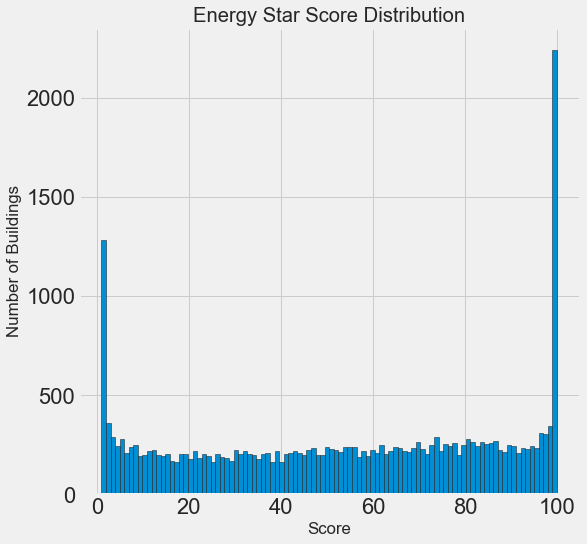

In [15]:
figsize(8, 8)

data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

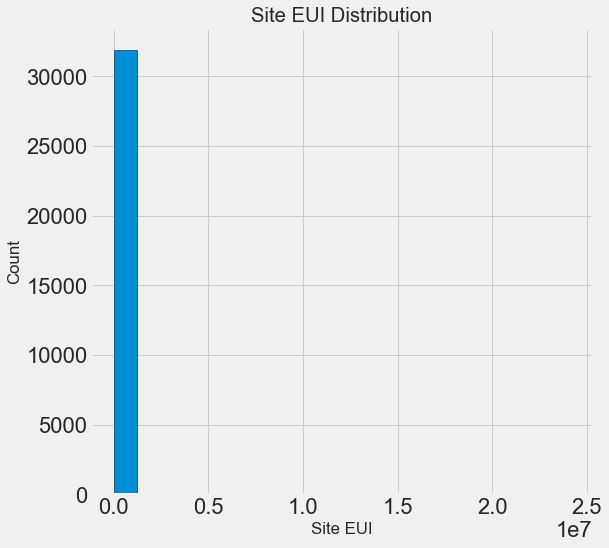

In [16]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [17]:
data['Site EUI (kBtu/ft²)'].describe()

count    3.188800e+04
mean     9.922633e+02
std      1.349948e+05
min      0.000000e+00
25%      5.800000e+01
50%      7.990000e+01
75%      1.034000e+02
max      2.405806e+07
Name: Site EUI (kBtu/ft²), dtype: float64

In [18]:
data.loc[data['Site EUI (kBtu/ft²)'] == 860, :]

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status


In [19]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

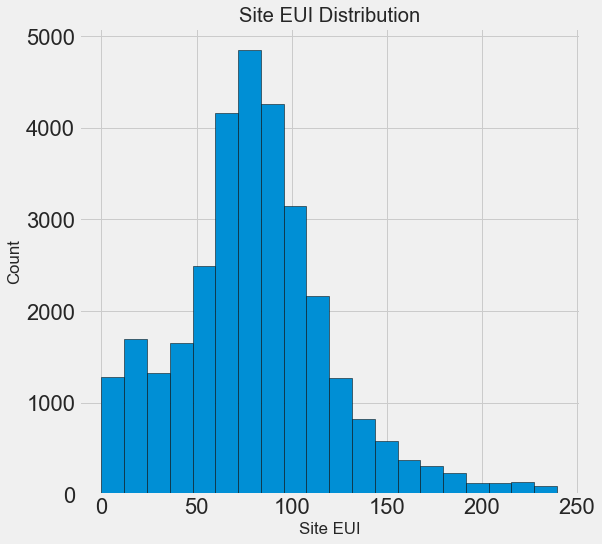

In [20]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [21]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

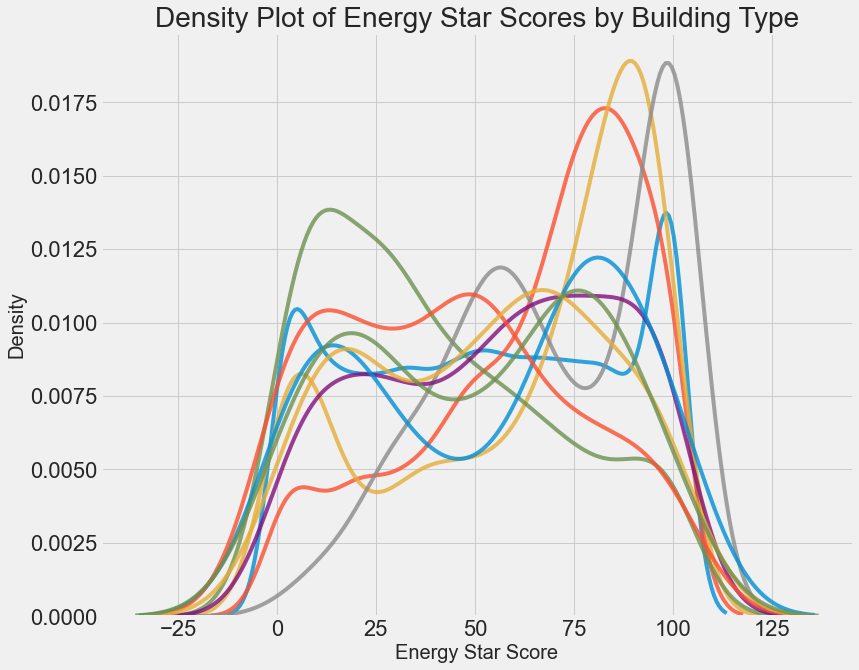

In [22]:
figsize(12, 10)

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [23]:
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

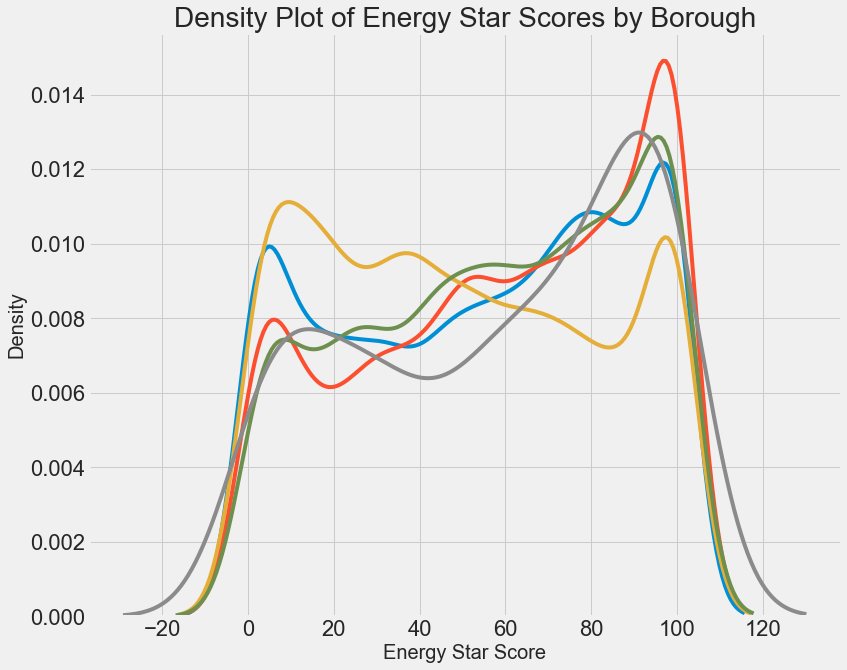

In [24]:
figsize(12, 10)

for borough in boroughs:
    subset = data[data['Borough'] == borough]
    
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

In [25]:
correlations_data = data.corr()['score'].sort_values()

print(correlations_data.head(15), '\n')

print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.349015
Property Id                                                  -0.138856
Order                                                        -0.098902
Direct GHG Emissions (Metric Tons CO2e)                      -0.094196
Weather Normalized Site Natural Gas Use (therms)             -0.080714
Natural Gas Use (kBtu)                                       -0.079888
Total GHG Emissions (Metric Tons CO2e)                       -0.068426
Occupancy                                                    -0.048963
Electricity Use - Grid Purchase (kWh)                        -0.018676
Electr

In [26]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

categorical_subset = data[['Borough', 'Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features = features.dropna(subset = ['score'])

correlations = features.corr()['score'].dropna().sort_values()

D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Miniconda3_W11\envs\zd62\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zer

In [27]:
correlations.head(15)

Site EUI (kBtu/ft²)                                               -0.764947
Weather Normalized Site EUI (kBtu/ft²)                            -0.759865
sqrt_Site EUI (kBtu/ft²)                                          -0.754405
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.748839
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.716912
sqrt_Source EUI (kBtu/ft²)                                        -0.709354
Weather Normalized Source EUI (kBtu/ft²)                          -0.676350
Source EUI (kBtu/ft²)                                             -0.664716
log_Site EUI (kBtu/ft²)                                           -0.663572
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.657328
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.650812
log_Source EUI (kBtu/ft²)                                         -0.648899
Weather Normalized Site Natural Gas Intensity (therms/ft²)        -0.477838
sqrt_Weather

In [28]:
correlations.tail(15)

log_BBL - 10 digits                                                0.037525
Largest Property Use Type_Hospital (General Medical & Surgical)    0.044757
sqrt_BBL - 10 digits                                               0.049665
BBL - 10 digits                                                    0.054764
Largest Property Use Type_K-12 School                              0.058834
Self-Reported Gross Floor Area (ft²)                               0.066285
Borough_Brooklyn                                                   0.066885
Largest Property Use Type_Residence Hall/Dormitory                 0.067337
Largest Property Use Type - Gross Floor Area (ft²)                 0.068612
Largest Property Use Type_Office                                   0.097753
sqrt_Self-Reported Gross Floor Area (ft²)                          0.104654
sqrt_Largest Property Use Type - Gross Floor Area (ft²)            0.108566
log_Self-Reported Gross Floor Area (ft²)                           0.133142
log_Largest 

D:\Miniconda3_W11\envs\zd62\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Miniconda3_W11\envs\zd62\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


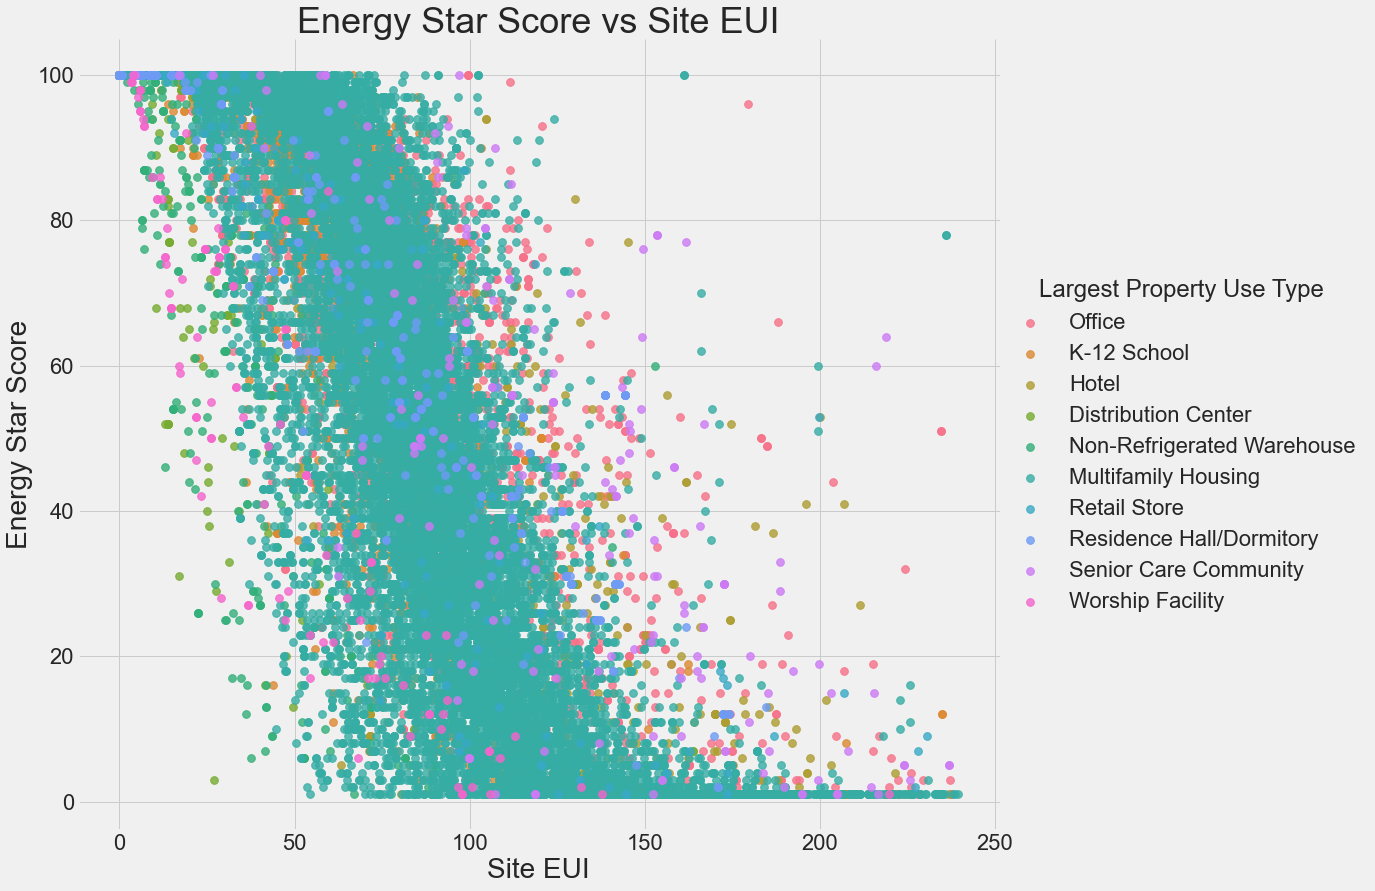

In [29]:
figsize(12, 10)

features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

features = features[features['Largest Property Use Type'].isin(types)]

sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

D:\Miniconda3_W11\envs\zd62\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


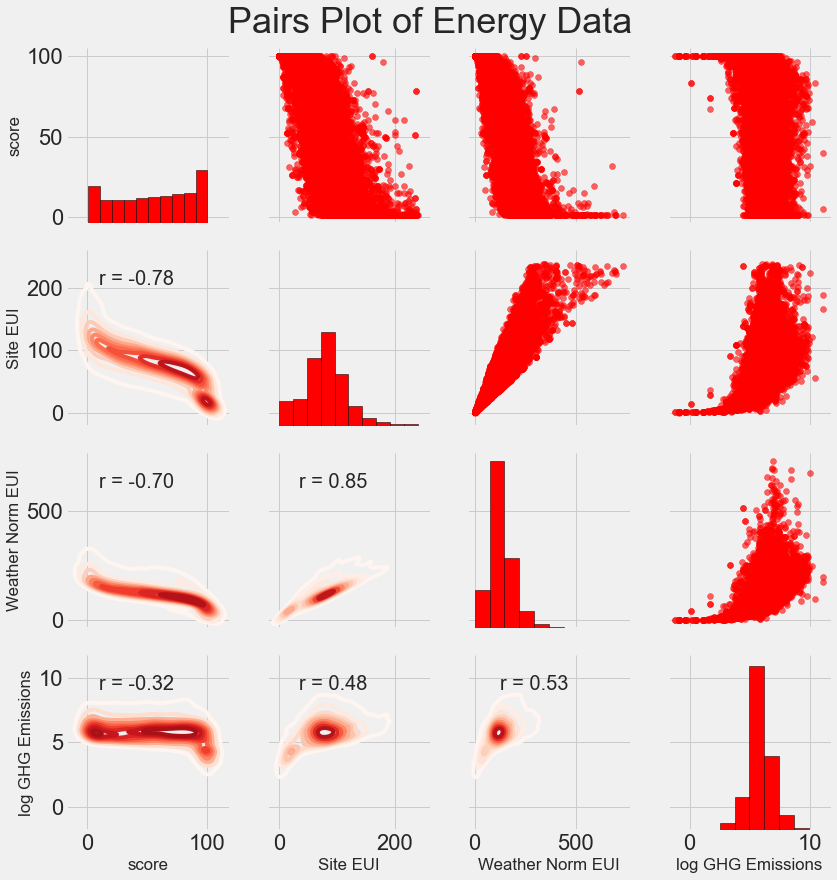

In [30]:
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

grid = sns.PairGrid(data = plot_data, size = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

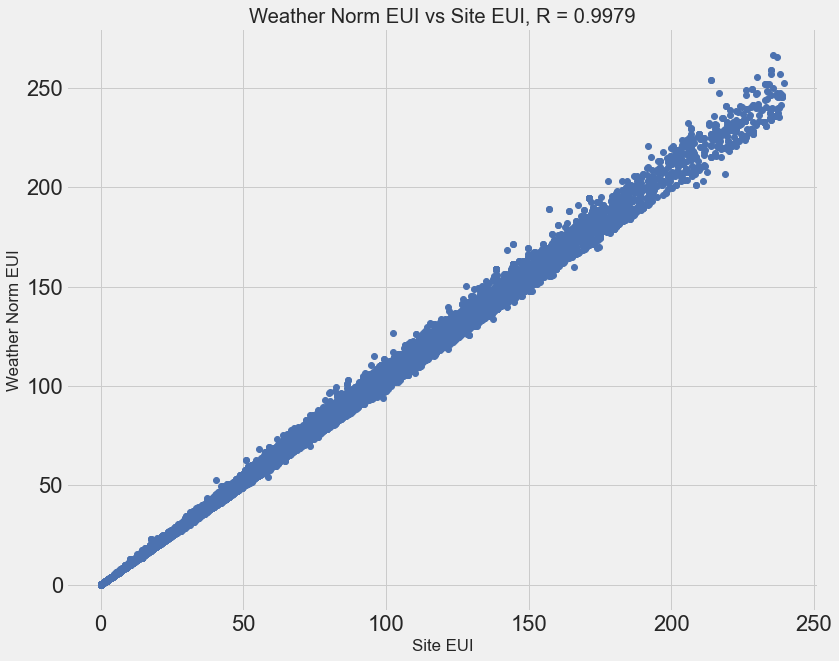

In [31]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [26]:
def remove_collinear_features(x, threshold):

    y = x['score']
    x = x.drop(columns = ['score'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y
               
    return x

features = remove_collinear_features(features, 0.6);

In [28]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(24706, 151)

In [29]:
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 151)
(24706, 151)


In [30]:
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

features = features.replace({np.inf: np.nan, -np.inf: np.nan})

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(17294, 150)
(7412, 150)
(17294, 1)
(7412, 1)


In [31]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [32]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 56.00
Baseline Performance on the test set: MAE = 28.0094
